In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders


In [2]:
presurvey=pd.read_excel("presurvey.xlsx")
postsurvey=pd.read_excel("postsurvey.xlsx")
pretest=pd.read_excel("pretest.xlsx")
postest=pd.read_excel("posttest.xlsx")

In [3]:
list1 = []
list2=[]
for i in range(0,15):
    sum1=0
    list1=pretest.iloc[i,3:10]
    sum1 = sum(list1)
    list2.append(sum1)
arr = np.array(list2)
pretest["TOTAL"] = arr

In [4]:
pretest.head()

,PSNUMBER,NAME,EMAIL ADDRESS,LO1,LO2,LO3,LO4,LO5,LO6,TOTAL
0,99003619,Aishwarya K H,aishwarya.k.h@ltts.com,8,4,7,3,2,8,32
1,99003651,Deepak Pradhan,deepak.pradhan@ltts.com,7,5,8,4,3,9,36
2,99003716,Mithun M R,mithun.mr@ltts.com,6,6,9,5,4,10,40
3,99003718,Prashant Bagal,prashantsudhir.bagal@ltts.com,5,7,1,6,5,9,33
4,99003608,Aakarsh Mehta,aakarsh.mehta@ltts.com,9,8,2,7,6,7,39


In [5]:
#Top 5 student
maxpre=0
def maximum():
    return pretest.nlargest(5,["TOTAL"])
    
print(maximum())

    PSNUMBER               NAME              EMAIL ADDRESS  LO1  LO2  LO3  \
11  99003650     Unnati Agrawal    unnati.agrawal@ltts.com    7    6    9   
10  99003713    Omprakash Harod   omprakash.harod@ltts.com    7    5    8   
8   99003648  Ankit Kumar yadav  ankitkumar.yadav@ltts.com    8    7    6   
2   99003716        Mithun M  R         mithun.mr@ltts.com    6    6    9   
6   99003654    Manzar hussain     manzar.hussain@ltts.com    5    5    4   

    LO4  LO5  LO6  TOTAL  
11    6    8    9     45  
10    8    7    8     43  
8     4   10    6     41  
2     5    4   10     40  
6     9    8    9     40  


In [6]:
#Bottom 3 student
minpre=0
def minimum():
    minpre=pretest.nsmallest(3,["TOTAL"])
    return minpre
    
print(minimum())


    PSNUMBER            NAME                  EMAIL ADDRESS  LO1  LO2  LO3  \
13  99003706  Lalit Bhardwaj        lalit.bhardwaj@ltts.com    5    4    2   
0   99003619   Aishwarya K H         aishwarya.k.h@ltts.com    8    4    7   
3   99003718  Prashant Bagal  prashantsudhir.bagal@ltts.com    5    7    1   

    LO4  LO5  LO6  TOTAL  
13    5   10    3     29  
0     3    2    8     32  
3     6    5    9     33  


In [24]:
avgpre=0
def average():
    avgpre=pretest["TOTAL"].mean()
    return avgpre

print(average())

37.13333333333333


In [25]:
def top_performer():
    return (pretest[pretest.TOTAL == pretest.TOTAL.max()])

top_performer()

,PSNUMBER,NAME,EMAIL ADDRESS,LO1,LO2,LO3,LO4,LO5,LO6,TOTAL,postestmarks,compare
11,99003650,Unnati Agrawal,unnati.agrawal@ltts.com,7,6,9,6,8,9,45,45,0


In [26]:
def fail():
    return (pretest[pretest["TOTAL"]<30])

fail()

,PSNUMBER,NAME,EMAIL ADDRESS,LO1,LO2,LO3,LO4,LO5,LO6,TOTAL,postestmarks,compare
13,99003706,Lalit Bhardwaj,lalit.bhardwaj@ltts.com,5,4,2,5,10,3,29,29,0


In [27]:
pretest["postestmarks"] = pretest["TOTAL"]

In [28]:
pretest["compare"]=pretest["postestmarks"]-pretest["TOTAL"]

In [29]:
def compare():
    return (pretest[["PSNUMBER","NAME","compare"]])
compare()

,PSNUMBER,NAME,compare
0,99003619,Aishwarya K H,0
1,99003651,Deepak Pradhan,0
2,99003716,Mithun M R,0
3,99003718,Prashant Bagal,0
4,99003608,Aakarsh Mehta,0
5,99003616,Yash Jhajharia,0
6,99003654,Manzar hussain,0
7,99003709,Digendra Kumar Sahu,0
8,99003648,Ankit Kumar yadav,0
9,99003711,Manu Nadar,0


In [30]:
pretest.head()

,PSNUMBER,NAME,EMAIL ADDRESS,LO1,LO2,LO3,LO4,LO5,LO6,TOTAL,postestmarks,compare
0,99003619,Aishwarya K H,aishwarya.k.h@ltts.com,8,4,7,3,2,8,32,32,0
1,99003651,Deepak Pradhan,deepak.pradhan@ltts.com,7,5,8,4,3,9,36,36,0
2,99003716,Mithun M R,mithun.mr@ltts.com,6,6,9,5,4,10,40,40,0
3,99003718,Prashant Bagal,prashantsudhir.bagal@ltts.com,5,7,1,6,5,9,33,33,0
4,99003608,Aakarsh Mehta,aakarsh.mehta@ltts.com,9,8,2,7,6,7,39,39,0


In [31]:
PS_list = []
def get_PSno():
    for i in range(0, 15):
        PS_list.append(pretest.iloc[i, 0])
    return PS_list


In [32]:
def plot_pre_survey_chart(location):
    labels=np.array(['LO1','LO2','LO3','LO4','LO5','LO6'])
    stats=presurvey.loc[location,labels].values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.show()
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=3)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)

    ax.set_title([presurvey.loc[location,"NAME"]])
    ax.grid(True)
    plt.savefig('output1.jpeg', dpi=300, bbox_inches='tight')
    return
    

def plot_post_survey_chart(location):
        labels=np.array(['LO1','LO2','LO3','LO4','LO5','LO6'])
        stats=postsurvey.loc[location,labels].values
        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
        fig=plt.show()
        ax = plt.subplot(111, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=3)
        ax.fill(angles, stats, alpha=0.25)
        ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)

        ax.set_title([postsurvey.loc[location,"NAME"]])
        ax.grid(True)
        plt.savefig('output2.jpeg', dpi=300, bbox_inches='tight')
        return

def plot_pre_test_chart(location):
        labels=np.array(['LO1','LO2','LO3','LO4','LO5','LO6'])
        stats=pretest.loc[location,labels].values
        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
        fig=plt.show()
        ax = plt.subplot(111, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=3)
        ax.fill(angles, stats, alpha=0.25)
        ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)

        ax.set_title([pretest.loc[location,"NAME"]])
        ax.grid(True)
        plt.savefig('output3.jpeg', dpi=300, bbox_inches='tight')
        return
    
def plot_post_test_chart(location):
        labels=np.array(['LO1','LO2','LO3','LO4','LO5','LO6'])
        stats=postest.loc[location,labels].values
        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
        fig=plt.show()
        ax = plt.subplot(111, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=3)
        ax.fill(angles, stats, alpha=0.25)
        ax.set_thetagrids((angles * 180/np.pi)[0:6], labels)

        ax.set_title([postest.loc[location,"NAME"]])
        ax.grid(True)
        plt.savefig('output4.jpeg', dpi=300, bbox_inches='tight')
        return

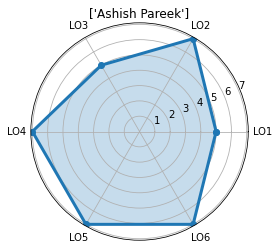

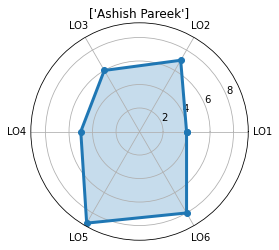

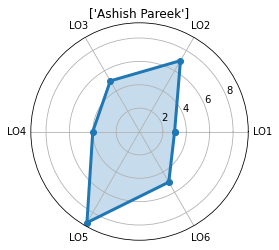

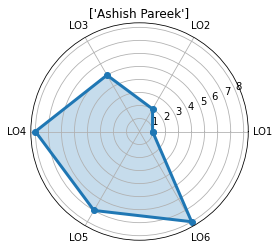

In [33]:
def get_ps(ps):
    
    for i in range(0,15):
        if (ps == pretest.iloc[i,0]):
            
            plot_pre_survey_chart(i)
            plot_post_survey_chart(i)
            plot_pre_test_chart(i)
            plot_post_test_chart(i)
get_ps(99003655)

ashish.pareek@ltts.com
Mail Sent
lalit.bhardwaj@ltts.com
Mail Sent
ashish.nayak@ltts.com
Mail Sent
prashantsudhir.bagal@ltts.com
Mail Sent
aakarsh.mehta@ltts.com


KeyboardInterrupt: 